In [1]:
%load_ext autoreload
%autoreload 2

In [105]:
import pandas  as pd
import pickle

In [107]:
from homan.datasets.epic import EpicFrame
from homan.datasets import epichoa
import epylab as pylab

In [66]:
import odlib
from homan.datasets.epicutils import read_epic_image
import numpy as np

In [34]:
epicframe = EpicFrame('/home/skynet/Zhifan/data/epic_analysis/clean_frame_debug.txt')

unable to load materials from: model_normalized.mtl
specified material (material_0_24)  not loaded!
unable to load materials from: model_normalized.mtl
specified material (material_0_24)  not loaded!
unable to load materials from: model_normalized.mtl
specified material (material_3_24)  not loaded!
specified material (material_2_24)  not loaded!
specified material (material_1_24)  not loaded!
specified material (material_0_24)  not loaded!
unable to load materials from: model_normalized.mtl
specified material (material_4_24)  not loaded!
specified material (material_2_24)  not loaded!
specified material (material_1_24)  not loaded!
unable to load materials from: model_normalized.mtl
specified material (material_2_24)  not loaded!
/home/skynet/miniconda3/envs/phosa16_env/lib/python3.7/site-packages/manopth/manolayer.py:72: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-wr

In [37]:
with open('/home/skynet/Zhifan/data/epic/EPIC_100_train.pkl', 'rb') as fp:
    annot_df = pickle.load(fp)

In [46]:
clip_df = annot_df[annot_df.index == 'P01_01_100']

In [47]:
vid_index, annotations = epicframe.compute_tracks(clip_df)

  0%|                                                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/home/skynet/Zhifan/homan-full/homan/datasets/epic.py:304: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  frame_idxs, bboxes = trackhoadf.track_hoa_df(

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.86it/s]

Got 1 object tracks with lengths         [45]
Got 1 left hand tracks with lengths         [22]
Got 3 right hand tracks with lengths         [10, 74, 24]


In [125]:
from PIL import Image
import cv2
from libyana.transformutils import handutils

In [96]:
# roi = np.array([3.66315765e+02, 1.48010254e-01, 5.17894745e+02, 1.51726990e+02])
affine_trans = np.array([[ 4.2222214e+00,  0.0000000e+00, -1.5466663e+03],
       [ 0.0000000e+00,  4.2222214e+00, -6.2493205e-01],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]], dtype=np.float32)

In [200]:
def read_interpolation_mask(vid, fid):
    save_dir = '/home/skynet/Zhifan/data/epic_analysis/interpolation/'
    path = f'{save_dir}/{vid}/frame_{fid:010d}.png'
    mask = Image.open(path)
    return mask

In [201]:
mask = read_interpolation_mask('P01_01', 28802)

In [203]:
np.asarray(mask).shape

(480, 854)

In [178]:
mask1 = mask.resize((640, 360), Image.NEAREST)

In [188]:
mask2 = handutils.transform_img(mask1, affine_trans, [640, 640])

In [204]:
mask3 = np.asarray(mask2)

In [205]:
mask3[mask3 != 4] = 0
mask3[mask3 == 4] = 1

In [206]:
mask3.shape

(640, 640)

In [196]:
import torch

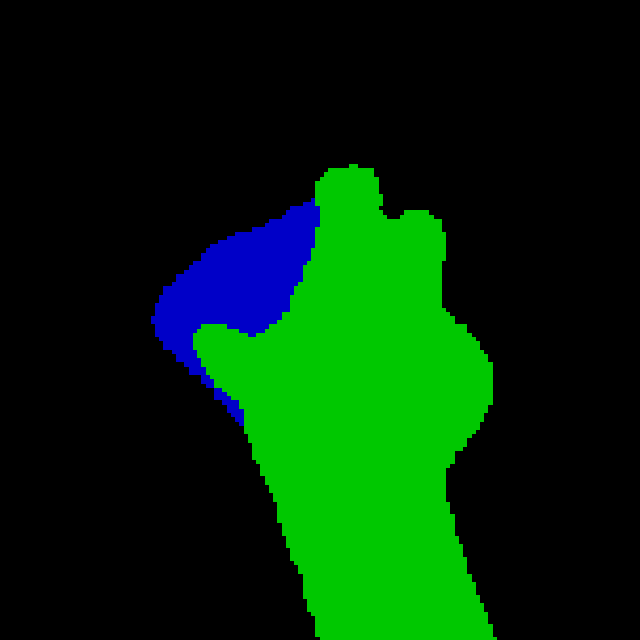

In [190]:
mask2